In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
neurons = torch.load("../neurons/LLaMA-2-7B.neuron.pth")
neurons

[[tensor([  162,   244,  1284,  2920,  3264,  3565,  4729,  5192,  5603,  6622,
           7003,  7116,  7817,  8388,  9383, 10081, 10780]),
  tensor([], dtype=torch.int64),
  tensor([], dtype=torch.int64),
  tensor([], dtype=torch.int64),
  tensor([5759, 9750]),
  tensor([  619,  1797, 10913]),
  tensor([], dtype=torch.int64),
  tensor([5948]),
  tensor([], dtype=torch.int64),
  tensor([], dtype=torch.int64),
  tensor([], dtype=torch.int64),
  tensor([3954, 5401, 5556]),
  tensor([8564]),
  tensor([6455, 6851]),
  tensor([670]),
  tensor([10437]),
  tensor([ 402, 3007, 5141]),
  tensor([1301, 8235, 8549]),
  tensor([973]),
  tensor([ 9761, 10958]),
  tensor([2392, 5679, 7864]),
  tensor([3894, 7795, 9967]),
  tensor([], dtype=torch.int64),
  tensor([3229, 4268]),
  tensor([], dtype=torch.int64),
  tensor([ 6029,  8693, 10465]),
  tensor([  731, 10300]),
  tensor([7946, 9667]),
  tensor([  721,  2657,  3376,  8341, 10409]),
  tensor([1196, 4467, 5773, 7006, 7865, 8027, 9651]),
  tensor

In [6]:
combined = [set() for _ in range(len(neurons[0]))]
for lang in neurons:
    for n in range(len(neurons[0])):
        combined[n] |= set(lang[n])
combined = [list(s) for s in combined]
totals = [len(a) for a in combined]

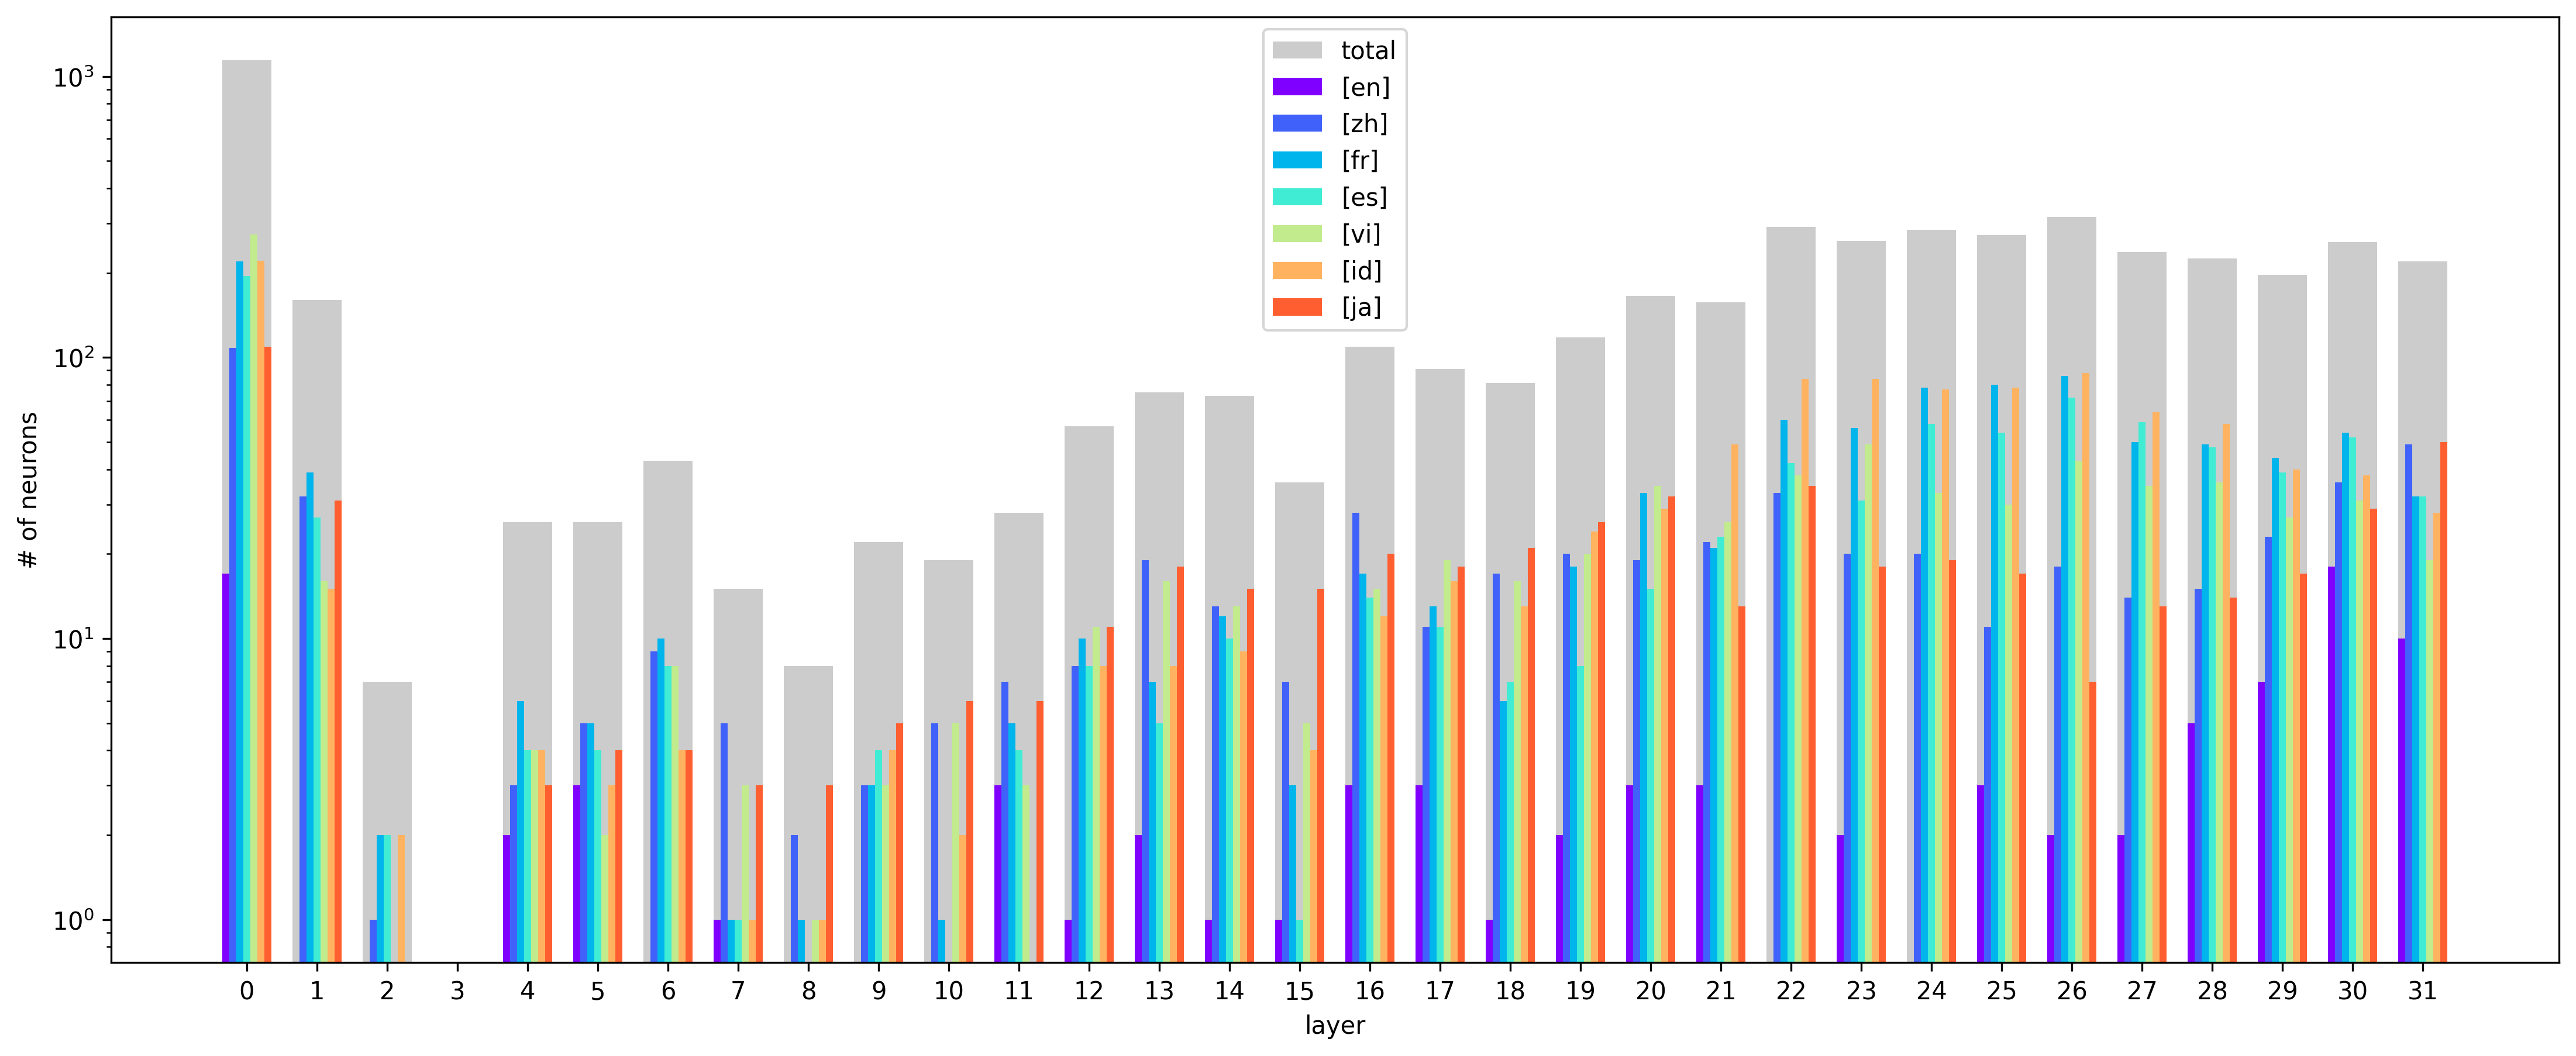

In [7]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i / (8)) for i in [0, 1, 2, 3, 5, 6, 7]]

langs = ["[en]", "[zh]", "[fr]", "[es]", "[vi]", "[id]", "[ja]"]

plt.figure(figsize=(18, 7), dpi=300)
plt.xlabel('layer')
plt.ylabel('# of neurons')

ax = plt.gca()
bar_width = 0.1
plt.bar([a for a in range(len(neurons[0]))], totals, width=bar_width*7, label="total", color="#000000", alpha=0.2)
for n in range(7):
    plt.bar([a+bar_width*(n-3) for a in range(len(neurons[0]))], [neuron.size()[0] for neuron in neurons[n]], width=bar_width, label=langs[n], color=colors[n])
plt.xticks([a for a in range(len(neurons[0]))], [a for a in range(len(neurons[0]))])
plt.yscale("log")
plt.legend()

In [8]:
# Sanity check, embedding size for the FNN studied here is 11008 
print([max(s).item() if len(s) > 0 else 0 for s in combined])

[10970, 10955, 10754, 0, 9750, 10913, 10643, 7017, 9260, 9976, 10575, 9790, 10803, 10018, 10542, 10437, 11000, 10857, 10741, 10958, 10559, 11007, 10993, 10995, 10982, 10961, 10989, 10991, 10878, 10961, 10960, 10895]


In [9]:
# Randomly sample the same amount of weights per layer
seed = 42
np.random.seed(seed)
random_neurons = []
for layer in totals:
    all_neurons = np.arange(0, 11008)
    random_sample = np.random.choice(all_neurons, size=layer, replace=False)
    random_neurons.append(random_sample)

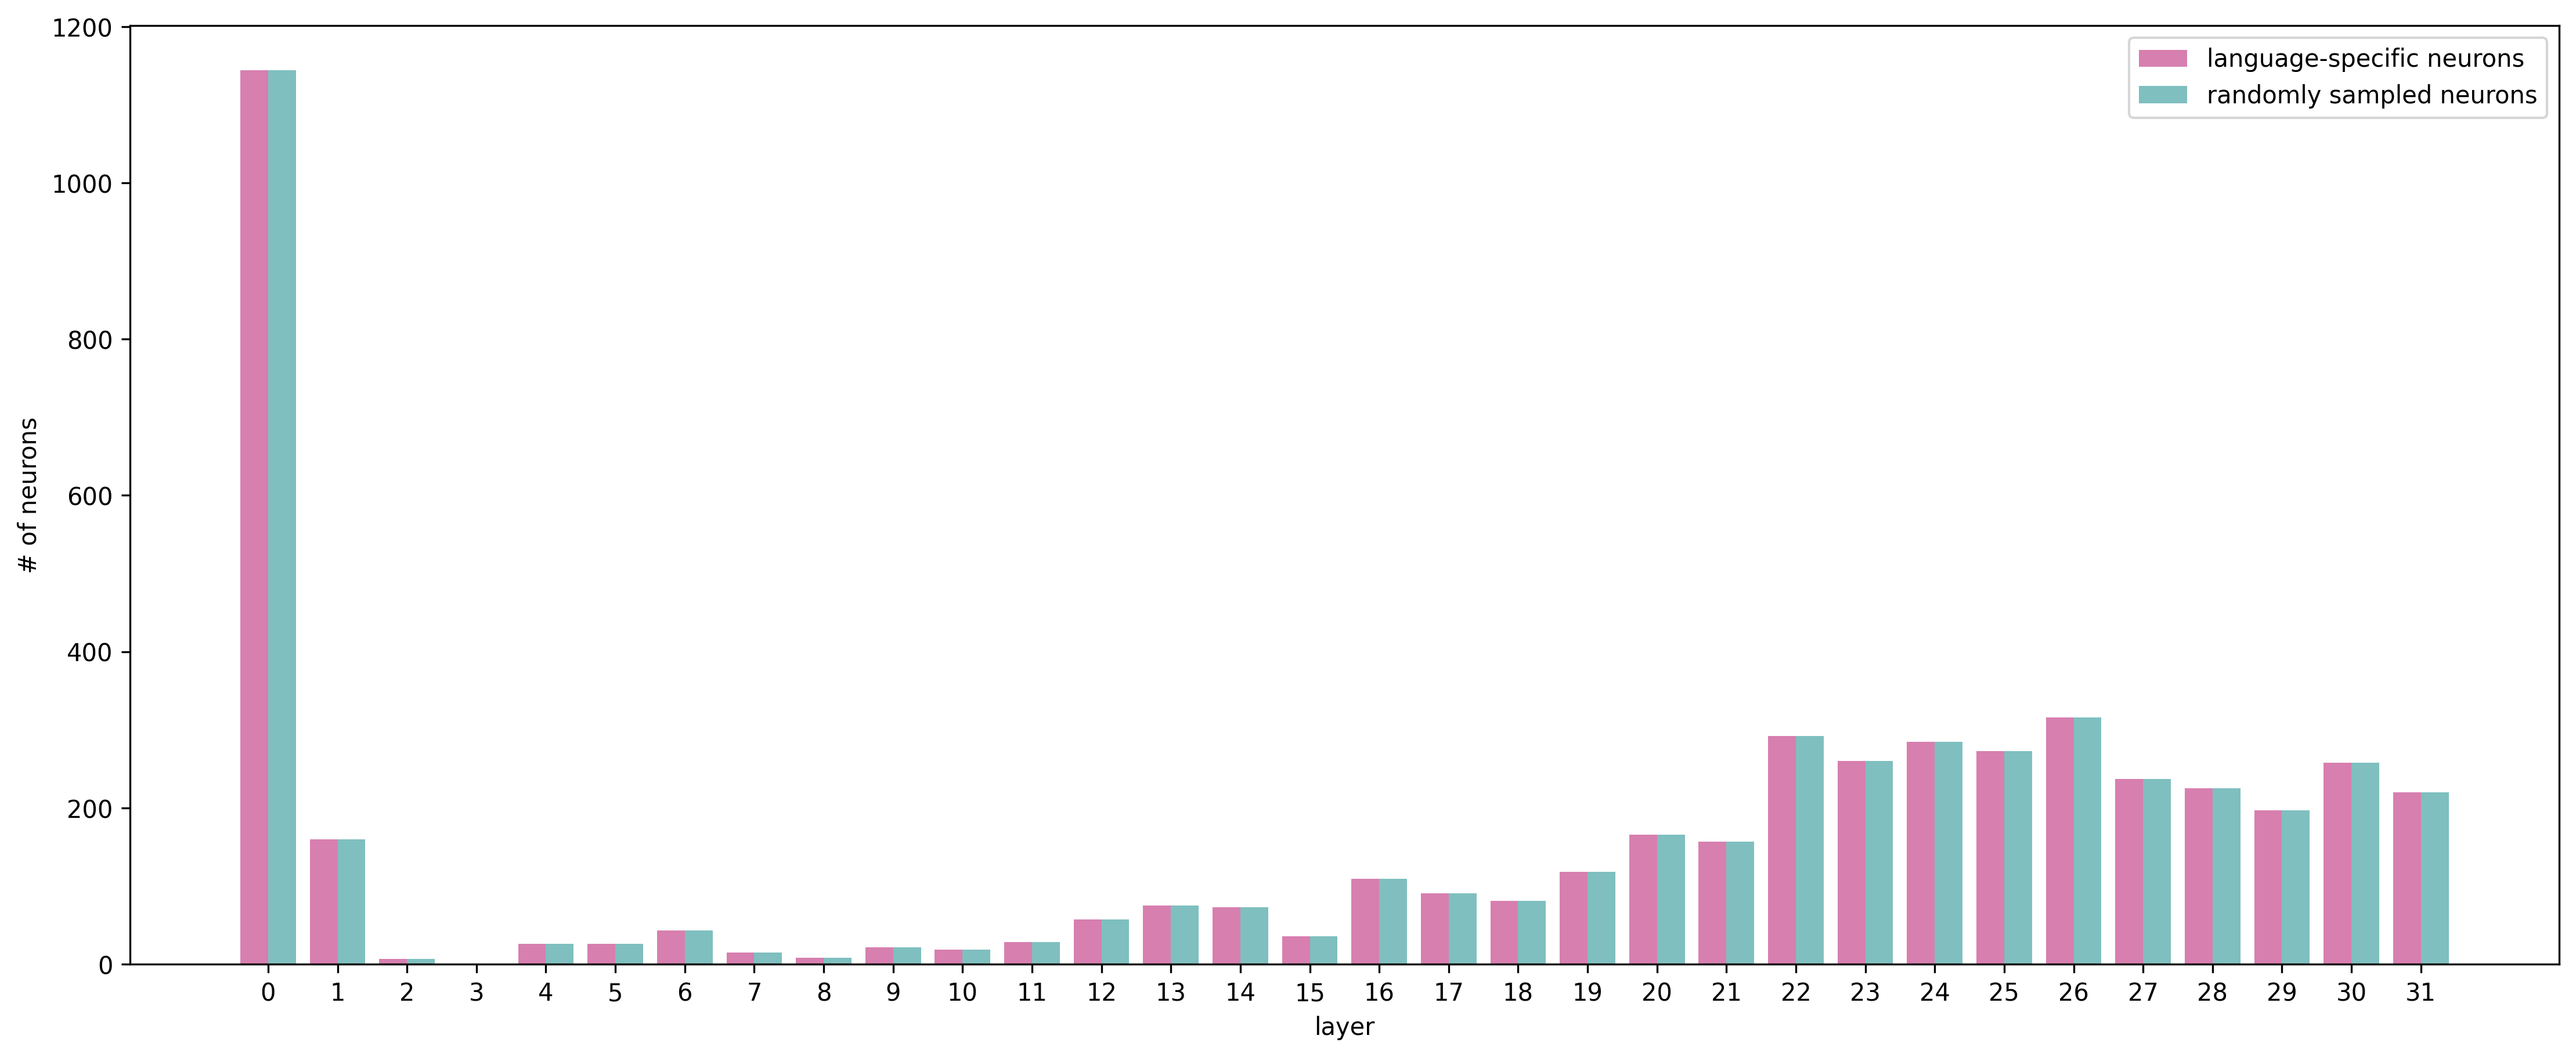

In [10]:
# another sanity check

plt.figure(figsize=(18, 7), dpi=300)
plt.xlabel('layer')
plt.ylabel('# of neurons')

ax = plt.gca()
bar_width = 0.2
plt.bar([a-bar_width for a in range(len(neurons[0]))], totals, width=bar_width*2, label="language-specific neurons", color="#B00060", alpha=0.5)
plt.bar([a+bar_width for a in range(len(neurons[0]))], [len(l) for l in random_neurons], width=bar_width*2, label="randomly sampled neurons", color="teal", alpha=0.5)
plt.xticks([a for a in range(len(neurons[0]))], [a for a in range(len(neurons[0]))])
plt.legend()

In [21]:
print("Total number of language-specific neurons in the model: ", sum(totals))

5024

In [19]:
set(random_neurons[1]) & set([a.item() for a in combined[1]])

{2576}

In [12]:
torch.save(combined, "./combined.neuron.pth")
torch.save(random_neurons, "./random.neuron.pth")